In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [20]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    width_shift_range=0.15, height_shift_range=0.15,
     zoom_range=0.2,
    brightness_range=[0.6,1.4], featurewise_center=True
    #validation_split=0.2 # divide o dataset em treino e validação
)
training_set = datagen.flow_from_directory(
    'C:/Users/Jefferson/Documents/FotosAlfabeto', 
    target_size = (256,430), 
    batch_size=32, 
    subset= 'training',
    class_mode = 'categorical')

Found 362 images belonging to 24 classes.


In [21]:
x_train,y_train = next(training_set)

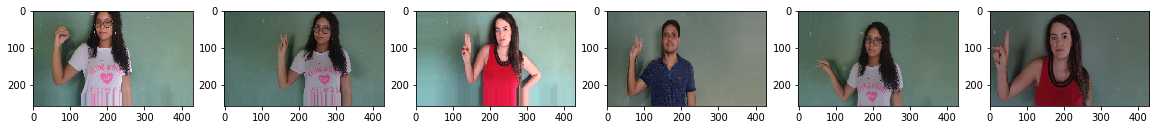

In [22]:
# Observar magens após pre processmento
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i])

In [23]:
x_train.shape

(32, 256, 430, 3)

In [21]:
x_train[0][0]

array([[0.32941177, 0.427451  , 0.37254903],
       [0.30980393, 0.4039216 , 0.3529412 ],
       [0.3019608 , 0.39607847, 0.3372549 ],
       ...,
       [0.5803922 , 0.60784316, 0.5411765 ],
       [0.5803922 , 0.60784316, 0.5411765 ],
       [0.5803922 , 0.60784316, 0.5411765 ]], dtype=float32)

In [24]:
# Iniciar CNN 
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu', input_shape = [256,430,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 512, activation='relu'))

cnn.add(tf.keras.layers.Dense(units = 24, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [25]:
cnn.fit(training_set,steps_per_epoch=362//32, epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 70s 6s/step - loss: 15.9615 - categorical_accuracy: 0.0152
Epoch 2/20
11/11 [==============================] - 65s 6s/step - loss: 3.2003 - categorical_accuracy: 0.0214
Epoch 3/20
11/11 [==============================] - 60s 5s/step - loss: 3.1774 - categorical_accuracy: 0.0596
Epoch 4/20
11/11 [==============================] - 60s 5s/step - loss: 3.1624 - categorical_accuracy: 0.0878
Epoch 5/20
11/11 [==============================] - 64s 6s/step - loss: 3.1745 - categorical_accuracy: 0.0325
Epoch 6/20
11/11 [==============================] - 59s 5s/step - loss: 3.1639 - categorical_accuracy: 0.0700
Epoch 7/20
11/11 [==============================] - 61s 5s/step - loss: 3.1667 - categorical_accuracy: 0.0535
Epoch 8/20
11/11 [==============================] - 57s 5s/step - loss: 3.1505 - categorical_accuracy: 0.0877
Epoch 9/20
11/11 [==============================] - 59s 5s/step - loss: 3.1561 - categorical_accuracy: 0.0963
Epoch 10/

In [26]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 428, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 214, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 212, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 106, 32)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 210304)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               107676160 
_________________________________________________________________
dense_5 (Dense)              (None, 24)               